Name: Amrita Sinha Roy 
Student ID: 501306770

In [1]:
!pwd

/content


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive/wce_endoscopy_dataset/

/content/drive/MyDrive/wce_endoscopy_dataset


In [4]:
!unzip archive.zip

Archive:  archive.zip
replace test/0_normal/test_normal_ (1).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

EfficientNetB0 only

In [ ]:


from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data generator for training and validation (rescaling pixel values)
datagen = ImageDataGenerator(rescale=1.0/255)

# Load train, validation, and test datasets
train_generator = datagen.flow_from_directory(
    f"train",
    target_size=(224, 224),  # Adjust to match your model input size
    batch_size=32,
    class_mode='categorical'  # Use 'binary' if you have only two classes
)

val_generator = datagen.flow_from_directory(
    f"val",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = datagen.flow_from_directory(
    f"test",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Shuffle should be False for the test set to maintain order
)
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load EfficientNetB0 as a base model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')  # Number of classes inferred from train_generator
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, validation_data=val_generator, epochs=10)

# Evaluate on Test Data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Save the Model
model.save("efficientnetb0.h5")


Found 3200 images belonging to 4 classes.
Found 2000 images belonging to 4 classes.
Found 800 images belonging to 4 classes.
Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1143s 11s/step - accuracy: 0.9088 - loss: 0.2771 - val_accuracy: 0.2500 - val_loss: 5.0191
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1094s 11s/step - accuracy: 0.9870 - loss: 0.0424 - val_accuracy: 0.3260 - val_loss: 1.4542
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1103s 11s/step - accuracy: 0.9954 - loss: 0.0158 - val_accuracy: 0.2420 - val_loss: 1.7093
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1157s 11s/step - accuracy: 0.9934 - loss: 0.0304 - val_accuracy: 0.2690 - val_loss: 1.8555
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1093s 11s/step - accuracy: 0.9949 - loss: 0.0188 - val_accuracy: 0.4655 - val_loss: 1.3198
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1104s 11s/step - accuracy: 0.9969 - loss: 0.0093 - val_accuracy: 0.3155 - val_loss: 2.0995
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1054s 11s/step - accuracy: 0.9909 - loss: 0.0295 

Test Loss: 0.2537166476249695
Test Accuracy: 0.9037500023841858


In [11]:
import matplotlib.pyplot as plt

# Function to plot accuracy and loss graphs
def plot_history(history, model_name="Model"):
    # Extract metrics from history
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    # Plot Accuracy
    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r^-', label='Validation Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Training Loss')
    plt.plot(epochs, val_loss, 'r^-', label='Validation Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()




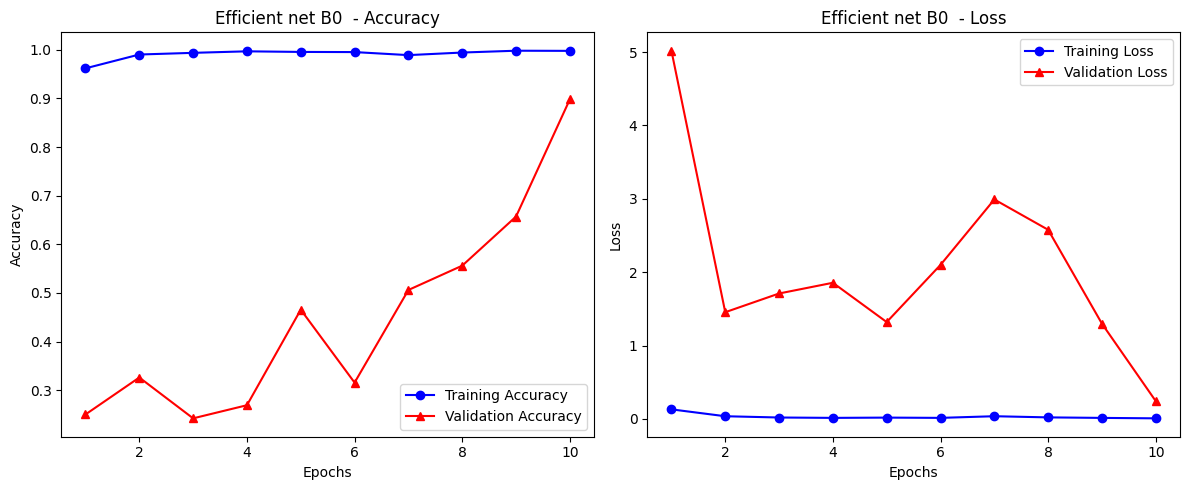

In [ ]:
# Plotting for EfficientNetB2
plot_history(history, model_name="Efficient net B0 ")